In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
def remove_col_spaces(wine_set):
    wine_set.columns = [x.strip().replace(' ', '_') for x in wine_set.columns]
    return wine_set

remove_col_spaces(df)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
df.isnull().sum().sum()

0

In [6]:
def basicInfo(df):
    print('total lenght=  ',len(df))
    print(len(df.columns))
    print(list(df.columns.values))
    
    print('\n')
    print("--------------describe the data-----------------")
    print('\n')
    print(df.describe())

basicInfo(df)

total lenght=   1599
12
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


--------------describe the data-----------------


       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000    

In [7]:
import seaborn as sns

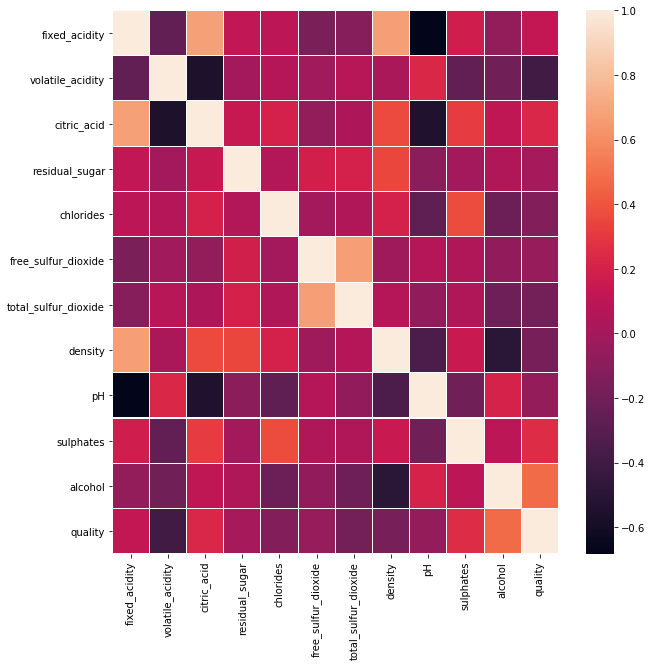

In [8]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,ax=ax,linewidth=0.1)
plt.savefig('output1.png',dpi=300)

In [9]:
quality_ids={5:0,6:1,7:1,4:0,8:1,3:0}

In [10]:
df['quality_ids']=df.quality.map(quality_ids)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_ids
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test,=train_test_split(df[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']],df['quality_ids'],test_size=0.2,random_state=10,shuffle=False)

In [13]:
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1274,7.8,0.580,0.13,2.1,0.102,17.0,36.0,0.99440,3.24,0.53,11.2
1275,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5
1276,8.5,0.400,0.40,6.3,0.050,3.0,10.0,0.99566,3.28,0.56,12.0
1277,7.0,0.690,0.00,1.9,0.114,3.0,10.0,0.99636,3.35,0.60,9.7


In [14]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1279,9.8,0.300,0.39,1.7,0.062,3.0,9.0,0.99480,3.14,0.57,11.5
1280,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4
1282,7.9,0.765,0.00,2.0,0.084,9.0,22.0,0.99619,3.33,0.68,10.9
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
y_train

0       0
1       0
2       0
3       1
4       0
       ..
1274    1
1275    1
1276    0
1277    1
1278    1
Name: quality_ids, Length: 1279, dtype: int64

In [16]:
y_test

1279    1
1280    1
1281    1
1282    1
1283    1
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality_ids, Length: 320, dtype: int64

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf=DecisionTreeClassifier(random_state=0)


In [19]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [20]:
df_predict=clf.predict(x_test)
df_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score


In [22]:
mse=mean_squared_error(y_test,df_predict)
df_accuracy=accuracy_score(y_test,df_predict)
pre=precision_score(y_test,df_predict,average='weighted')

In [23]:
print('Accuracy= ',df_accuracy)
print('Error=  ',mse)
print('Precision Score', pre)

Accuracy=  0.584375
Error=   0.415625
Precision Score 0.5848780776515152


# LOGESTIC regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

In [26]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_predict=lr.predict(x_test)
mse=mean_squared_error(y_test,lr_predict)
df_accuracy=accuracy_score(y_test,lr_predict)
pre=precision_score(y_test,lr_predict,average='weighted')


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
print('Accuracy= ',df_accuracy)
print('Error=  ',mse)
print('Precision Score', pre)

Accuracy=  0.75
Error=   0.25
Precision Score 0.7588274686472665


# RendomForestClassifier

In [28]:
from sklearn.ensemble import  RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)
mse=mean_squared_error(y_test,lr_predict)
rf_accuracy=accuracy_score(y_test,lr_predict)
pre=precision_score(y_test,lr_predict,average='weighted')

print('Accuracy= ',rf_accuracy)
print('Error=  ',mse)
print('Precision Score', pre)

Accuracy=  0.75
Error=   0.25
Precision Score 0.7588274686472665


# naive_bayes

In [29]:

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)
mse=mean_squared_error(y_test,nb_predict)
nb_accuracy=accuracy_score(y_test,nb_predict)
pre=precision_score(y_test,nb_predict,average='weighted')

print('Accuracy= ',nb_accuracy)
print('Error=  ',mse)
print('Precision Score', pre)

Accuracy=  0.7375
Error=   0.2625
Precision Score 0.737772983444875


# SVM

In [36]:
from sklearn.svm import SVC
sv=SVC(random_state=40,C=.9)
sv.fit(x_train,y_train)
sv_predict=sv.predict(x_test)
mse=mean_squared_error(y_test,sv_predict)
sv_accuracy=accuracy_score(y_test,sv_predict)
pre=precision_score(y_test,sv_predict,average='weighted')

print('Accuracy= ',sv_accuracy)
print('Error=  ',mse)
print('Precision Score', pre)
print(classification_report(y_test,sv_predict))

Accuracy=  0.559375
Error=   0.440625
Precision Score 0.5840089285714286
              precision    recall  f1-score   support

           0       0.63      0.28      0.38       159
           1       0.54      0.84      0.66       161

    accuracy                           0.56       320
   macro avg       0.58      0.56      0.52       320
weighted avg       0.58      0.56      0.52       320



# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
knn_predict=knn.predict(x_test)
mse=mean_squared_error(y_test,knn_predict)
knn_accuracy=accuracy_score(y_test,knn_predict)
pre=precision_score(y_test,knn_predict,average='weighted')

print('Accuracy= ',knn_accuracy)
print('Error=  ',mse)
print('Precision Score', pre)
print(classification_report(y_test,rf_predict))

Accuracy=  0.5625
Error=   0.4375
Precision Score 0.5631458921260781
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       159
           1       0.68      0.76      0.72       161

    accuracy                           0.70       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.70      0.70      0.70       320



In [39]:
from sklearn.metrics import confusion_matrix,classification_report
c_n=confusion_matrix(y_test,rf_predict)
c_n


array([[101,  58],
       [ 38, 123]], dtype=int64)

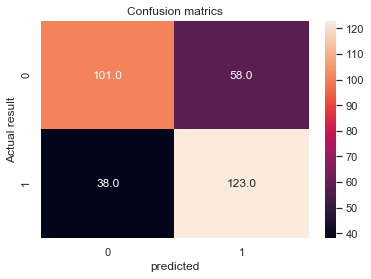

In [40]:
sns.heatmap(c_n,annot=True,fmt='0.1f')
plt.title('Confusion matrics')
plt.xlabel('predicted')
plt.ylabel('Actual result')
plt.savefig('outpufdddft.png',dpi=300)

In [41]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       159
           1       0.68      0.76      0.72       161

    accuracy                           0.70       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.70      0.70      0.70       320



# Exploration

In [42]:
def remove_col_spaces(wine_set):
    wine_set.columns = [x.strip().replace(' ', '_') for x in wine_set.columns]
    return wine_set

remove_col_spaces(df)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_ids
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


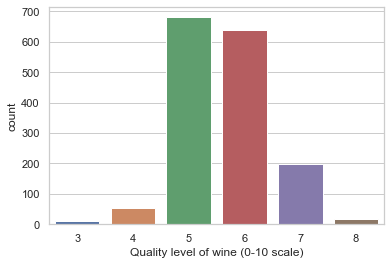

In [43]:
def countplots(df):
    df["quality"] = pd.Categorical(df["quality"])
    sns.countplot(x="quality", data=df)
    plt.xlabel("Quality level of wine (0-10 scale)")
    plt.savefig('output.png',dpi=300)

countplots(df)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


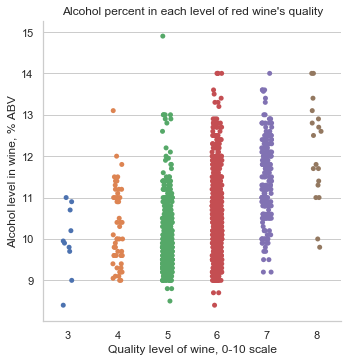

In [44]:

def factorplots(df):
    sns.factorplot(x="quality", y="alcohol", data=df, kind="strip")
    plt.xlabel("Quality level of wine, 0-10 scale")
    plt.ylabel("Alcohol level in wine, % ABV")
    if df.equals(df):
        plt.title("Alcohol percent in each level of red wine's quality")
    else:
        plt.title("Alcohol percent in each level of white wine's quality")
    plt.savefig('kjhoutput.png',dpi=300)

factorplots(df)

In [45]:
def quartileSplit(df):
    print("This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;")
    print("II-nd - the number of wine samples with the quality in the corresponding interval.")
    df["quality_quart"] = pd.qcut(df["quality"], 3)
    print(df.groupby("quality_quart").size())
quartileSplit(df)

This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;
II-nd - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    744
(5.0, 6.0]      638
(6.0, 8.0]      217
dtype: int64


In [46]:
def frequencyDists(df):
    print("This is the frequency distribution of the wines' quality.")
    print(df.groupby("quality").size()*100 / len(df))
    print()

frequencyDists(df)

This is the frequency distribution of the wines' quality.
quality
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
dtype: float64



# DATA ANALYSIS

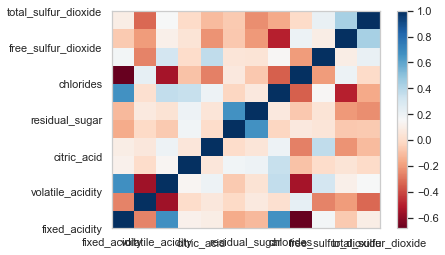

In [47]:
def covmax(df):
    cov_mat = df.corr(method='pearson')
 
    fig = plt.figure().add_subplot(111)
    
    plt.pcolor(cov_mat, cmap='RdBu')
    plt.colorbar()
    fig.set_xticklabels(df.columns)
    fig.set_yticklabels(df.columns)
    plt.savefig('aoioutput.png',dpi=300)
    
covmax(df)

In [48]:

import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import numpy as np
import seaborn
import matplotlib.pyplot as plt

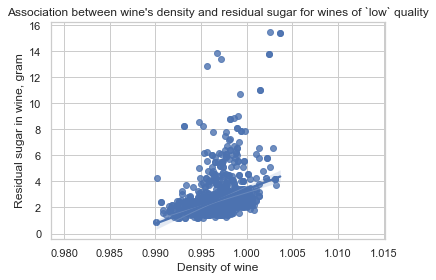

In [49]:
scat0 = seaborn.regplot(x=df["density"], y=df["residual_sugar"], fit_reg=True)
plt.xlabel("Density of wine")
plt.ylabel("Residual sugar in wine, gram")
plt.title("Association between wine's density and residual sugar for wines of `low` quality")
plt.savefig('aii.png',dpi=300)

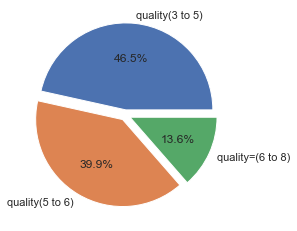

In [50]:
a=['quality(3 to 5)','quality(5 to 6)','quality=(6 to 8)']
b=[   744, 638,     217]
plt.pie(b,labels=a,radius=1,autopct='%0.01f%%',explode=[.06,.06,0.06])
plt.savefig('put799.png',dpi=300)

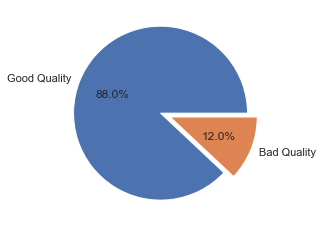

In [51]:
a=['Good Quality','Bad Quality']
b=[   88,12]
plt.pie(b,labels=a,radius=1,autopct='%0.01f%%',explode=[.06,.06])
plt.savefig('put79.png',dpi=300)